In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
from astroML.datasets import fetch_rrlyrae_mags

data = fetch_rrlyrae_mags()  
# number of objects in dataset
data

array([(   4099, b'ab', 0.641754, 0.53460825, 51075.2747138 , 0.56383873, 51075.2889021 , 0.39832583, 51075.29511177, 0.31785124, 51075.29508408, 51075.28823496, 9.35678889e-01,  1.11585889e+00, 0.089,  17.75, 18.134, 16.989, 16.777, 16.703, 16.685, 16.846),
       (  13350, b'ab', 0.547987, 1.02944498, 54025.33011167, 1.09332221, 54025.32685608, 0.80171957, 54025.32647433, 0.64211098, 54025.32618473, 54025.3279015 , 2.83436944e-01,  1.17852194e+00, 0.08 ,  24.77, 18.839, 17.679, 17.544, 17.497, 17.501, 17.57 ),
       (  15927, b'ab', 0.612263, 0.65157937, 53680.22248492, 0.697439  , 53680.2294389 , 0.48655403, 53680.22621397, 0.36867402, 53680.24342144, 53680.24710123, 3.25465806e+00, -5.84066111e-01, 0.09 ,  29.12, 19.288, 18.058, 17.859, 17.792, 17.78 , 17.921),
       (  20406, b'ab', 0.631853, 0.5532473 , 54000.28052778, 0.5867838 , 54000.29210904, 0.42684628, 54000.27663061, 0.34273443, 54000.29377981, 54000.29641207, 3.24436889e+00,  2.18891111e-01, 0.088,   9.13, 16.715, 15.54

In [30]:
data = data.byteswap().newbyteorder()

df = pd.DataFrame(data)
display(df)  

,__SIG2010_,Type,Per,uAmp,T0_u,gAmp,T0_g,rAmp,T0_r,iAmp,...,RAJ2000,DEJ2000,Ar,Dist,umag,gmag,rmag,imag,zmag,Vmag
0,4099,b'ab',0.641754,0.534608,51075.274714,0.563839,51075.288902,0.398326,51075.295112,0.317851,...,0.935679,1.115859,0.089,17.750000,18.134001,16.989000,16.777000,16.702999,16.684999,16.846001
1,13350,b'ab',0.547987,1.029445,54025.330112,1.093322,54025.326856,0.801720,54025.326474,0.642111,...,0.283437,1.178522,0.080,24.770000,18.839001,17.679001,17.544001,17.497000,17.500999,17.570000
2,15927,b'ab',0.612263,0.651579,53680.222485,0.697439,53680.229439,0.486554,53680.226214,0.368674,...,3.254658,-0.584066,0.090,29.120001,19.288000,18.058001,17.858999,17.792000,17.780001,17.921000
3,20406,b'ab',0.631853,0.553247,54000.280528,0.586784,54000.292109,0.426846,54000.276631,0.342734,...,3.244369,0.218891,0.088,9.130000,16.715000,15.543000,15.336000,15.286000,15.276000,15.403000
4,21992,b'ab',0.625880,1.109322,53698.245218,1.139930,53698.245256,0.849551,53698.243534,0.661144,...,4.315354,1.054582,0.077,7.350000,16.186001,15.040000,14.909000,14.864000,14.853000,14.932000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,4956681,b'ab',0.499544,1.079098,53272.486302,1.304108,53272.501031,0.971932,53272.495204,0.730201,...,58.700931,1.228830,1.051,36.880001,19.476000,18.513000,18.454000,18.480000,18.504999,18.434000
479,4983075,b'ab',0.646700,0.443980,54064.376360,0.487079,54064.399463,0.339135,54064.415166,0.278196,...,57.156605,0.134676,0.527,29.150000,19.114000,18.054001,17.868999,17.818001,17.841999,17.923000
480,4984662,b'ab',0.636863,0.565909,53994.452735,0.599289,53994.470683,0.464574,53994.472022,0.359037,...,57.128875,-0.389138,0.584,39.049999,19.745001,18.701000,18.489000,18.454000,18.452000,18.558001
481,4992418,b'ab',0.580371,0.930774,53681.401696,0.984270,53681.408671,0.722729,53681.416038,0.560006,...,57.151443,0.892965,0.479,31.459999,19.278999,18.214001,18.042000,18.000000,17.997000,18.089001


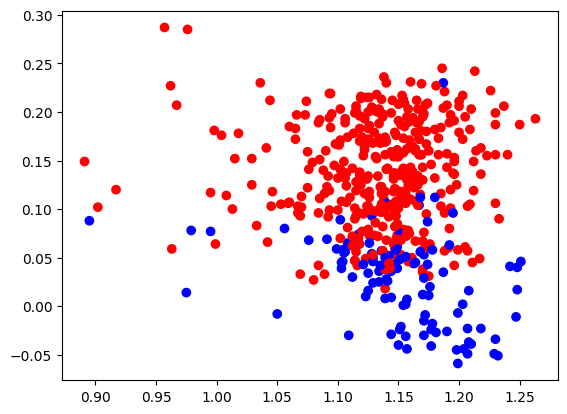

In [31]:
df['u-g'] = df['umag'] - df['gmag']
df['g-r'] = df['gmag'] - df['rmag']
df['r-i'] = df['rmag'] - df['imag']
df['i-z'] = df['imag'] - df['zmag']

plt.scatter(df['u-g'], df['g-r'], c=np.where(df['Type'] == b'ab', 'r', 'b'))

Algorithm 3.1 The first algorithm that computes a (1 + ϵ)-approximation to MEB(A).

In [32]:
def phi(u):
    return sum(u[i]*np.dot(A[i].T, A[i])for i in range(len(u))) - np.dot(sum(u[i]*A[i] for i in range(len(u))).T,sum(u[i]*A[i] for i in range(len(u))))

def e(idx):
    vec = np.zeros(len(A))
    vec[idx] = 1
    return vec

In [33]:
A = df[df['Type']==b'ab'][['u-g', 'g-r']].values

epsilon = 0.001
distances_to_a_1 = np.linalg.norm(A - A[0], axis=1)**2  # ||a_i - a_1||^2
alpha = np.argmax(distances_to_a_1)
distances_to_a_alpha = np.linalg.norm(A - A[alpha], axis=1)**2  if alpha is not None else np.zeros(len(A))  # ||a_i - a_α||^2
beta = np.argmax(distances_to_a_alpha)

u = np.zeros(len(A))
u[alpha] = 0.5
u[beta] = 0.5

chi = [A[alpha], A[beta]]
c = sum(u[i] * A[i] for i in range(len(A)))

mu = phi(u)

distances_to_c = np.linalg.norm(A - c, axis=1)**2
kappa = np.argmax(distances_to_c)

lambd= np.zeros(len(A))

delta = (distances_to_c[kappa]/mu)-1.0

k = 0

while delta > ((1 + epsilon)**2) - 1.0:
    lambd = delta/(2*(1.0+delta))
    k = k + 1
    u = (1-lambd)*u + lambd*e(kappa)
    c = (1-lambd)*c + lambd*A[kappa]
    chi.append(A[kappa])
    mu = phi(u)
    distances_to_c = np.linalg.norm(A - c, axis=1)**2
    kappa = np.argmax(distances_to_c)
    delta = (distances_to_c[kappa]/mu)-1

print(c)
print(chi)
print
print(np.sqrt((1+delta)*mu))
print(k)


[1.0778055  0.16498214]
[array([0.9020004 , 0.10199928], dtype=float32), array([1.2629995 , 0.19299984], dtype=float32), array([0.89100075, 0.14899826], dtype=float32), array([1.2629995 , 0.19299984], dtype=float32), array([0.89100075, 0.14899826], dtype=float32), array([1.2629995 , 0.19299984], dtype=float32), array([0.89100075, 0.14899826], dtype=float32), array([1.2629995 , 0.19299984], dtype=float32), array([0.89100075, 0.14899826], dtype=float32), array([1.2629995 , 0.19299984], dtype=float32), array([0.89100075, 0.14899826], dtype=float32), array([1.2629995 , 0.19299984], dtype=float32), array([0.89100075, 0.14899826], dtype=float32), array([1.2629995 , 0.19299984], dtype=float32), array([0.89100075, 0.14899826], dtype=float32), array([1.2629995 , 0.19299984], dtype=float32), array([0.89100075, 0.14899826], dtype=float32), array([1.2629995 , 0.19299984], dtype=float32), array([0.89100075, 0.14899826], dtype=float32), array([1.2629995 , 0.19299984], dtype=float32), array([0.891000

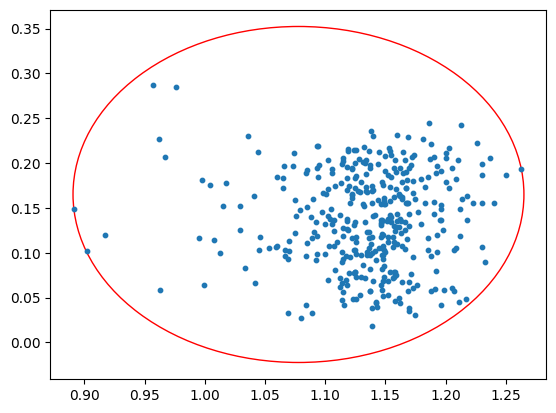

In [34]:
circle = plt.Circle(tuple(c), np.sqrt(mu), color='r', fill=False)

ax = plt.gca()
ax.cla() # clear things for fresh plot

ax.add_patch(circle)

plt.scatter(A[:, 0], A[:, 1], s=10)